<a href="https://colab.research.google.com/github/Surya120604/My-first-project-in-data-science/blob/main/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!mkdir .p ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘.p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:06<00:00, 187MB/s]
100% 1.06G/1.06G [00:06<00:00, 170MB/s]


In [10]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [12]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode='int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 106ms/step - loss: 1.1236 - accuracy: 0.6056 - val_loss: 0.5780 - val_accuracy: 0.7086
Epoch 2/10
625/625 [==============================] - 64s 101ms/step - loss: 0.5588 - accuracy: 0.7172 - val_loss: 0.5918 - val_accuracy: 0.6884
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4848 - accuracy: 0.7735 - val_loss: 0.4624 - val_accuracy: 0.7818
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3978 - accuracy: 0.8222 - val_loss: 0.4451 - val_accuracy: 0.7942
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3462 - accuracy: 0.8493 - val_loss: 0.4201 - val_accuracy: 0.8076
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2709 - accuracy: 0.8850 - val_loss: 0.5510 - val_accuracy: 0.7886
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2034 - accuracy: 0.9163 - val_loss: 0.6170 - val_ac

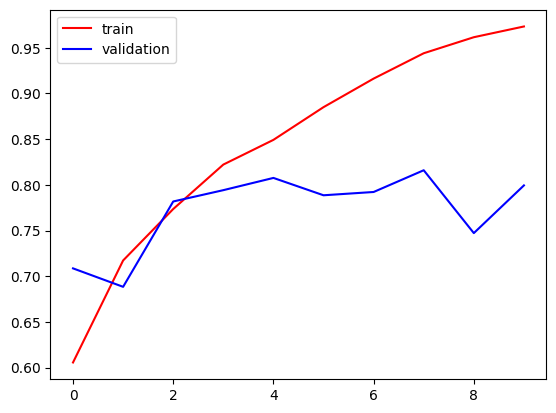

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

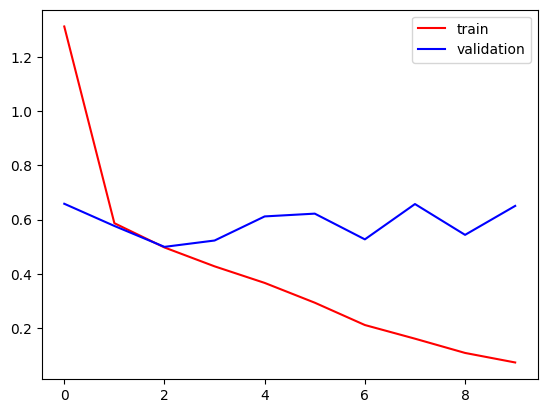

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
import cv2

In [28]:
test_image=cv2.imread('/content/cat.10007.jpg')

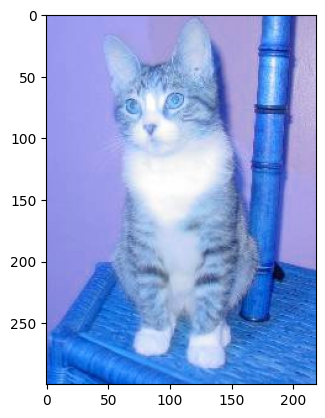

In [29]:
plt.imshow(test_image)

In [30]:
test_image.shape

(300, 219, 3)

In [31]:
test_image = cv2.resize(test_image,(256,256))

In [32]:
test_input = test_image.reshape(1,256,256,3)

In [33]:
model.predict(test_input)

1/1 [==============================] - 0s 415ms/step


array([[0.]], dtype=float32)